In [1]:
%%capture
! pip install nltk

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')
warn()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


This function helps prepare the SMS Spam dataset.


In [3]:
def prepare_data():
    try:
        data = pd.read_csv("spam.csv", encoding='latin-1')
    except FileNotFoundError:
        print("Data file not found, make sure it's downloaded.")

    data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)
    data.rename(columns={"v1": "label", "v2": "text"}, inplace=True)
    data.label = data['label'].map({'ham':0, 'spam':1})
    data['Count'] = data['text'].apply(lambda x: len(x))

    sw=stopwords.words("english")
    vectorizer = TfidfVectorizer(stop_words=sw, binary=True)

    X = vectorizer.fit_transform(data.text).toarray()
    y = data.label

    return X, y

This function plots the loss and accuracy curve from the training history of a neural network.


In [4]:
def plot_metrics(history):
    fig = plt.figure(figsize=(10,5))
    for i, metric in enumerate(['acc', 'loss']):
        train_metrics = history.history[metric]
        val_metrics = history.history['val_'+metric]
        epochs = range(1, len(train_metrics) + 1)
        plt.subplot(1,2,i+1)
        plt.plot(epochs, train_metrics)
        plt.plot(epochs, val_metrics)
        plt.title('Training and validation '+ metric)
        plt.xlabel("Epochs")
        plt.ylabel(metric)
        plt.legend(["train_"+metric, 'val_'+metric])


## Overfitting
 In the following figure, we see a two-class classification problem. The red points represent one class, and Blue Points represent the second class. The actual decision boundary is shown in black. Most points are in the correct region, but several samples are in the incorrect region; this could be for many reasons, such as noise or outliers. The key point is that you do not expect data points of these classes in these regions.

The second model in green is meant to approximate the decision boundary; this model classifies the data points, even the data points in the incorrect regions. This model does not generalize well. This is because most data points will not be in those regions. As a result, the data will do poorly on data not from the original dataset, like data in the real world. This if called **overfitting**.

To combat overfitting or high variance, we introduce 5 regularization techniques in this guided project for you to choose from the next time you train your neural network. They are:

- L2 (Ridge) regularization
- L1 (Lasso) regularization
- Dropout
- Batch Normalization
- Data shuffling


## L2 Regularization


In [6]:
tf.keras.regularizers.l2(l2=0.01)

This object can be passed as an argument to a Dense layer:


In [8]:
dense_layer = Dense(32,
                activation="relu",
                kernel_regularizer=tf.keras.regularizers.l2(l2=0.01))

## L1 Regularization
### Using L1 Regularization in Keras

Similar to how we used L2, `tf.keras.regularizers` module also has a built-in L1 class:


In [11]:
dense_layer = Dense(32,
            activation="relu",
            kernel_regularizer=tf.keras.regularizers.l1(l1=0.01))

In [12]:
dense_layer = Dense(32,
                activation="relu",
                kernel_regularizer="l1")

### Using Dropout in Keras

In Keras, Dropout can be applied using the Dropout class from **keras.layers**. A dropout rate can be specified when creating the dropout layer, which is the percentage of neurons that will be turned off during one update.


In [13]:
from tensorflow.keras.layers import Dropout

dropout_layer = Dropout(rate=0.2)

### Using Batch Normalization in Keras

In Keras, you can add a Batch Norm layer in between the Dense layers by calling `BatchNormalization()` from **keras.layers**. Here is a code example:


In [15]:
from tensorflow.keras.layers import Dense, BatchNormalization

batchnorm_layer = BatchNormalization()

## Example 1: Apply regularization techniques on simulated data

In this example, we will use the **generate_data** function to simulate a degree-3 polynomial dataset with some random noise. We will intentionally overfit the data by creating a polynomial features of the data, and then we will observe whether the four regularization techniques can mitigate overfitting in this case.


Let's first visualize the polynomial data:


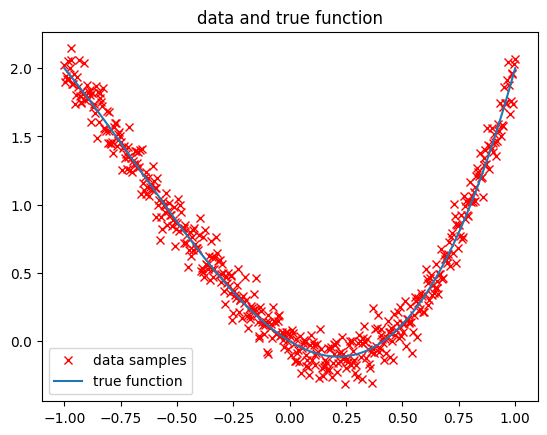

In [16]:
def generate_data(seed=43,std=0.1,samples=500):
    np.random.seed(seed)
    X =np.linspace(-1,1,samples)
    f = X**3 +2*X**2 -X
    y=f+np.random.randn(samples)*std

    return X, y


X,y = generate_data()
f = X**3 +2*X**2 -X
plt.plot(X, y,'rx',label="data samples")
plt.plot(X, f,label="true function")
plt.title("data and true function")
plt.legend()
plt.show()

Let's also add some outliers to y:


In [17]:
y[20:30] = 0
y[100:110] = 2
y[180:190] = 4
y[260:270] = -2
y[340:350] = -3
y[420:430] = 4

plt.plot(X, y,'rx',label="data samples")
plt.plot(X, f,label="true function")
plt.legend()
plt.show()

Let's use an overly complex neural network to fit our simulated data.


In [20]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(1000, activation='relu',input_shape=(1,)))
model.add(Dense(120,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=1e-3), loss="mean_squared_error")
model.fit(X, y,epochs=20, batch_size=100)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1.7971
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.2569 
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8977
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0594
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9822 
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8640 
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7850 
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9996 
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8066 
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7962 
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7569 
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7295  
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7282 
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7669 
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7502 
Epoch 16/20
5/5 ━━━━━━━━━━━━━━━━

When we plot out the original data and the predictions, we can see that because the model's weights are not regularized, it tends to over fit  on new data:


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


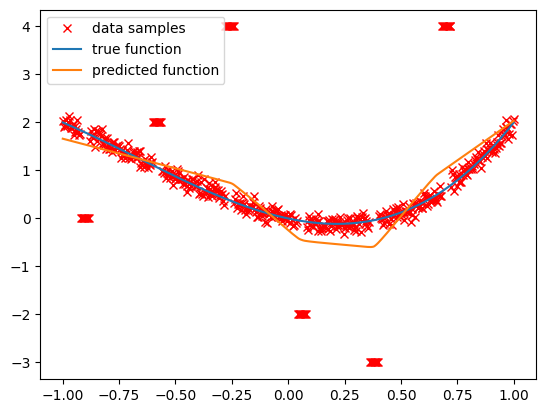

In [21]:
y_pred = model.predict(X)
plt.plot(X, y,'rx',label="data samples")
plt.plot(X, f,label="true function")
plt.plot(X, y_pred ,label="predicted function")
plt.legend()
plt.show()

We can also calculate the mean square error:

In [22]:
no_reg = np.mean((y-y_pred)**2)
print(f"Mean squared error is {no_reg}\n")

Mean squared error is 1.918945961132474



Now let's apply the four regularization technique: **L1, L2, Drop out, and Batch Normalization** and see which works best for our data!


### L1 (Lasso)


In [26]:
model_l1 = Sequential()

model_l1.add(Dense(1000, activation='relu',input_shape=(1,),kernel_regularizer=keras.regularizers.l1(l1=0.01)))
model_l1.add(Dense(120,activation='relu',kernel_regularizer=keras.regularizers.l1(l1=0.001)))
model_l1.add(Dense(120,activation='relu'))
model_l1.add(Dense(1))
model_l1.compile(optimizer=Adam(learning_rate=1e-3), loss="mean_squared_error")
model_l1.fit(X, y,  epochs=20, batch_size=100)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.3908
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.6314  
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.8337 
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3559 
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.7906 
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4570 
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1070 
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7757 
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2920 
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.0960
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.9276
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6719 
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3818 
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3488 
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.3357
Epoch 16/20
5/5 ━━━━━━━━━━━━━━━━━━

we can plot the model, we see the model tracks the data:


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


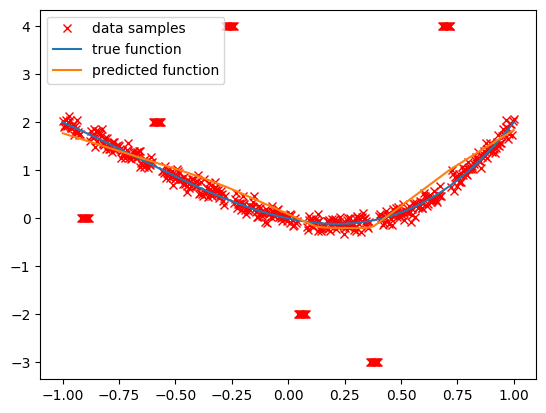

In [27]:
y_pred = model_l1.predict(X)
plt.plot(X, y,'rx',label="data samples")
plt.plot(X, f,label="true function")
plt.plot(X, y_pred,label="predicted function")
plt.legend()
plt.show()

we can also calculate the mean square error; we see L1 regulation decreases the error:


In [28]:
l1 = np.mean((y-y_pred)**2)
print(f"Mean squared error is {l1}\n")

Mean squared error is 1.7075953115614035



### L2 (Ridge)


In [31]:
model_l2 = Sequential()

model_l2.add(Dense(1000, activation='relu',input_shape=(1,),kernel_regularizer=keras.regularizers.l2(l2=0.0001)))
model_l2.add(Dense(120,activation='relu',kernel_regularizer=keras.regularizers.l2(l2=0.0001)))
model_l2.add(Dense(120,activation='relu',kernel_regularizer=keras.regularizers.l2(l2=0.0001)))
model_l2.add(Dense(1))
model_l2.compile(optimizer=Adam(learning_rate=1e-3), loss="mean_squared_error")
model_l2.fit(X, y, validation_split=0.2, epochs=20, batch_size=40)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 1.2874 - val_loss: 4.3974
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8365 - val_loss: 5.0547
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9208 - val_loss: 4.4316
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6766 - val_loss: 3.7297
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6859 - val_loss: 4.3710
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7658 - val_loss: 4.0303
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7661 - val_loss: 3.6326
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6260 - val_loss: 3.4665
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7147 - val_loss: 3.3167
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6527 - val_loss: 3.1052
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7076 - val_loss: 3.3601
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8000 - va

we can plot the model,we can also calculate the mean square error; we see L2 regulation can also improve the result by a little bit:


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


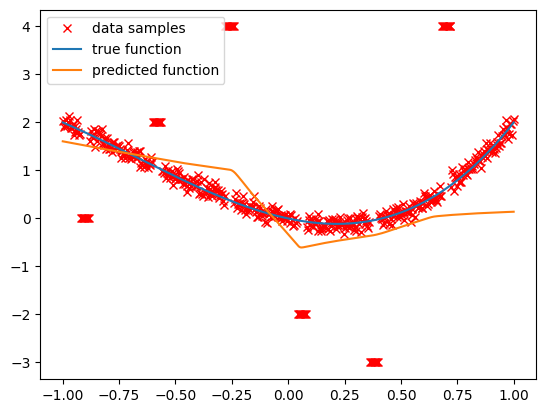

In [32]:
y_pred = model_l2.predict(X)
plt.plot(X, y,'rx',label="data samples")
plt.plot(X, f,label="true function")
plt.plot(X, y_pred ,label="predicted function")
plt.legend()

In [33]:
l2 = np.mean((y-y_pred)**2)
print(f"Mean squared error is {l2}\n")

Mean squared error is 1.898234768566599



### Dropout


In [34]:
model_dp = Sequential()

model_dp.add(Dense(1000, activation='relu',input_shape=(1,)))
model_dp.add(Dropout(0.1))
model_dp.add(Dense(120,activation='relu'))
model_dp.add(Dropout(0.1))
model_dp.add(Dense(120,activation='relu'))
model_dp.add(Dropout(0.1))
model_dp.add(Dense(1))
model_dp.compile(optimizer=Adam(learning_rate=1e-3), loss="mean_squared_error")
model_dp.fit(X, y, validation_split=0.2, epochs=20, batch_size=40)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 1.3216 - val_loss: 3.9075
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7144 - val_loss: 4.7150
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8495 - val_loss: 4.2842
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7886 - val_loss: 3.9249
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8466 - val_loss: 4.1137
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7800 - val_loss: 3.7548
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6428 - val_loss: 3.4869
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6512 - val_loss: 3.2068
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6239 - val_loss: 3.1870
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7039 - val_loss: 2.9593
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6632 - val_loss: 3.2020
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7375 - va

Let's plot the prediction and calculate the mean square error;


In [35]:
y_pred = model_dp.predict(X)
plt.plot(X, y,'rx',label="data samples")
plt.plot(X, f,label="true function")
plt.plot(X, y_pred ,label="predicted function")
plt.legend()

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [36]:
dp = np.mean((y-y_pred)**2)
print(f"Mean squared error is {dp}\n")

Mean squared error is 1.8543808283976044



### Batch Norm


In [38]:
model_bn = Sequential()

model_bn.add(Dense(1000, activation='relu',input_shape=(1,)))
model_bn.add(BatchNormalization())
model_bn.add(Dense(120,activation='relu'))

model_bn.add(Dense(120,activation='relu'))
model_bn.add(Dense(1))
model_bn.compile(optimizer=Adam(learning_rate=1e-3), loss="mean_squared_error")
model_bn.fit(X, y, validation_split=0.2, epochs=20, batch_size=40)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 1.1438 - val_loss: 2.8092
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6131 - val_loss: 2.8918
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6924 - val_loss: 2.7484
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7037 - val_loss: 2.7349
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7462 - val_loss: 2.7587
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6093 - val_loss: 2.7863
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6511 - val_loss: 2.5449
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8152 - val_loss: 2.6788
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.8071 - val_loss: 2.7398
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7742 - val_loss: 2.7621
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7006 - val_loss: 2.7554
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6812 

We can observe that due to a stronger regularization of Batch Normalization, the model does not seem to fit the data very well. However, the mean square error actually shows a big improvement.


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


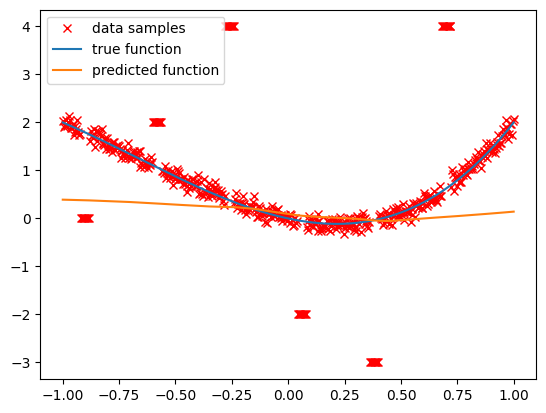

In [39]:
y_pred = model_bn.predict(X)
plt.plot(X, y,'rx',label="data samples")
plt.plot(X, f,label="true function")
plt.plot(X, y_pred ,label="predicted function")
plt.legend()

In [41]:
bn = np.mean((y-y_pred)**2)
print(f"Mean squared error is {bn}\n")

Mean squared error is 1.6084249185709951



### Data Shuffling

To apply data shuffling to avoid overfitting, we can simpy call `shuffle=True` when fitting the model.


In [42]:
model_sh = Sequential()

model_sh.add(Dense(1000, activation='relu',input_shape=(1,)))
model_sh.add(Dense(120,activation='relu'))
model_sh.add(Dense(120,activation='relu'))
model_sh.add(Dense(1))

model_sh.compile(optimizer=Adam(learning_rate=1e-3), loss="mean_squared_error")
model_sh.fit(X, y, validation_split=0.2, epochs=20, batch_size=40,shuffle=True)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 1.2290 - val_loss: 3.8327
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5731 - val_loss: 4.9661
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6653 - val_loss: 4.6506
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7838 - val_loss: 3.7454
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7995 - val_loss: 4.0148
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8552 - val_loss: 3.8007
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6779 - val_loss: 3.7000
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6229 - val_loss: 3.2471
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6131 - val_loss: 3.5360
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6161 - val_loss: 2.9872
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6378 - val_loss: 3.1790
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6124 - val

We can also calculate the mean square error on the data. Data Shuffling doesn't seem to be very effective for our data.


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


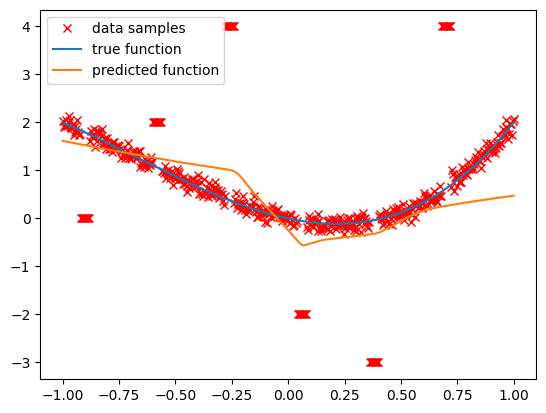

In [44]:
y_pred = model_sh.predict(X)

plt.plot(X, y,'rx',label="data samples")
plt.plot(X, f,label="true function")
plt.plot(X, y_pred ,label="predicted function")
plt.legend()

In [45]:
sh = np.mean((y-y_pred)**2)
print(f"Mean squared error is {sh}\n")

Mean squared error is 1.805669636032262



Let's compare the mean squared errors of the networks trained using different regularization techniques:


In [47]:
names = ['No_reg','L1','L2','Drop_out','Batch_norm','Data_shuffling']
error = [no_reg, l1, l2, dp, bn, sh]

plt.figure(figsize=(8, 4))
plt.bar(names, error, width=0.6)
plt.title("Mean Squared Error", fontsize=13)

for i, err in enumerate(error):
    plt.text(i-0.2, err+0.1, str(round(err,3)), color='blue', va='center')

## Example 2: Spam Classification

In this example, we will dive into a real world application, which is a spam classification problem. We will work with the [SMS Spam Collection Dataset](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0HJYEN39861783-2022-01-01) from Kaggle and use neural networks for classifying a message as either Spam or Ham (not spam).

We first download and display the raw dataset:


In [49]:
pip install skillsnetwork

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 73.3 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [68]:
import skillsnetwork

await skillsnetwork.download("/content/sample_data/spam.csv", overwrite=True)


TypeError: download() got an unexpected keyword argument 'overwrite'

In [70]:
import skillsnetwork

# Directly use await in a Colab cell (only works in Colab or Jupyter with IPython)
await skillsnetwork.download("/content/sample_data/spam.csv", overwrite=True)


TypeError: download() got an unexpected keyword argument 'overwrite'

In [ ]:
import pandas as pd

# Upload the CSV file manually (this method works in Jupyter or Colab)
from google.colab import files
uploaded = files.upload()

# After uploading, read the CSV file
file_path = 'spam.csv'  # Change this to the correct file name
df = pd.read_csv(file_path)
df.head()  # Display first few rows
